# Applied Machine Learning 2021- Assignment 1

## Exploring the weather in Athens
Exploring the weather in Athens over a period of more than 50 years

> Student Name: Aikaterini Dimatou </br>
> AM: 8180199

---

## Q1: Obtain the Data

* Importing the required libraries

In [141]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

%matplotlib inline

* data_filename: csv that we downloaded from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/) and in particular https://www.ncdc.noaa.gov/cdo-web/search) --> station Hellinikon  



* supplementary_data_filename = athens.csv file that we downloaded from https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f

In [142]:
data_filename = "data/weather_hellinikon.csv"
supplementary_data_filename = "data/athens.csv"

* We obtain the data from the csv files

* With the parameter parse_dates=['DATE'] we are stating that column DATE is a date 

* As the athens.csv file does not have column headers, we obtain the data with the parameter header=None. Also, with the parameter na_values="---" we are stating that some values are "---" and thus they should be read as NaN

In [143]:
data = pd.read_csv(data_filename, 
                   parse_dates=['DATE'])
supplementary_data = pd.read_csv(supplementary_data_filename, header=None, na_values="---")

In [144]:
data

STATION            NAME  LATITUDE  LONGITUDE  ELEVATION       DATE  \
0      GR000016716  HELLINIKON, GR      37.9      23.75       10.0 1955-01-01   
1      GR000016716  HELLINIKON, GR      37.9      23.75       10.0 1955-01-02   
2      GR000016716  HELLINIKON, GR      37.9      23.75       10.0 1955-01-03   
3      GR000016716  HELLINIKON, GR      37.9      23.75       10.0 1955-01-04   
4      GR000016716  HELLINIKON, GR      37.9      23.75       10.0 1955-01-05   
...            ...             ...       ...        ...        ...        ...   
23246  GR000016716  HELLINIKON, GR      37.9      23.75       10.0 2020-12-27   
23247  GR000016716  HELLINIKON, GR      37.9      23.75       10.0 2020-12-28   
23248  GR000016716  HELLINIKON, GR      37.9      23.75       10.0 2020-12-29   
23249  GR000016716  HELLINIKON, GR      37.9      23.75       10.0 2020-12-30   
23250  GR000016716  HELLINIKON, GR      37.9      23.75       10.0 2020-12-31   

       PRCP  SNWD  TAVG  TMAX  TMIN  
0       0.0   NaN   NaN  18.5  10.2  
1       2.0   NaN   NaN  14.4   7.0  
2       0.0   NaN   NaN  15.8   9.6  
3       0.0   NaN   NaN  18.8   7.3  
4       0.0   NaN   NaN  17.9   8.4  
...     ...   ...   ...   ...   ...  
23246   0.0   NaN  16.6   NaN   NaN  
23247   6.6   NaN  14.8  18.2  11.9  
23248   0.0   NaN  16.3  19.9  12.5  
23249   0.0   NaN  16.4  19.9  14.8  
23250   0.0   NaN  15.4  18.2   NaN  

[23251 rows x 11 columns]

In [145]:
supplementary_data

0     1     2     3     4   5   6       7       8       9   \
0     2010-01-01  17.9  18.1  17.8  61.4  91  33  1003.6  1006.3  1002.0   
1     2010-01-02  15.6  15.7  15.5  57.4  70  45  1005.2  1008.7  1001.5   
2     2010-01-03  13.5  13.6  13.4  56.0  76  39  1011.7  1016.7  1008.6   
3     2010-01-04   9.5   9.6   9.5  50.7  60  38  1021.3  1023.1  1016.8   
4     2010-01-05  13.4  13.5  13.4  70.5  82  54  1018.7  1022.1  1015.5   
...          ...   ...   ...   ...   ...  ..  ..     ...     ...     ...   
3647  2019-12-27  10.1  10.2  10.0  60.3  79  44  1018.4  1019.9  1016.8   
3648  2019-12-28   8.3   8.4   8.2  60.9  82  46  1016.0  1017.2  1014.2   
3649  2019-12-29   6.4   6.5   6.4  73.4  82  66  1017.6  1018.9  1016.5   
3650  2019-12-30   4.0   4.0   3.9  83.9  90  65  1020.0  1024.2  1016.6   
3651  2019-12-31   6.4   6.5   6.3  72.3  86  58  1025.4  1026.7  1023.9   

        10    11   12    13  
0      0.2   4.0  WSW  12.7  
1      0.0   6.8  WSW  20.7  
2      0.0   5.0  WSW  15.4  
3      0.0   4.3  NNE  11.0  
4      0.0   7.9    S  19.8  
...    ...   ...  ...   ...  
3647   0.0   2.9   NE   8.0  
3648   7.2   4.3   NE  12.8  
3649   3.4  10.6  NNE  24.5  
3650  12.4   5.1   NE  15.0  
3651   0.0   2.7    W   9.4  

[3652 rows x 14 columns]

* After reading the documentation and understanding what kind of data each column represents, we create a new csv file athens_with_header.csv with the method .to_csv() adding the header 

In [146]:
supplementary_data.to_csv("athens_with_header.csv", header= ["DATE", "TAVG", 
    "TMAX", "TMIN", "HAVG", "HMAX", "HMIN", "PAVG", "PMAX", "PMIN", "PRCP", "WAVG", "WDIR", "WMAX"], index=False)

In [147]:
supplementary = pd.read_csv("athens_with_header.csv", parse_dates= ["DATE"])

In [148]:
supplementary

DATE  TAVG  TMAX  TMIN  HAVG  HMAX  HMIN    PAVG    PMAX    PMIN  \
0    2010-01-01  17.9  18.1  17.8  61.4    91    33  1003.6  1006.3  1002.0   
1    2010-01-02  15.6  15.7  15.5  57.4    70    45  1005.2  1008.7  1001.5   
2    2010-01-03  13.5  13.6  13.4  56.0    76    39  1011.7  1016.7  1008.6   
3    2010-01-04   9.5   9.6   9.5  50.7    60    38  1021.3  1023.1  1016.8   
4    2010-01-05  13.4  13.5  13.4  70.5    82    54  1018.7  1022.1  1015.5   
...         ...   ...   ...   ...   ...   ...   ...     ...     ...     ...   
3647 2019-12-27  10.1  10.2  10.0  60.3    79    44  1018.4  1019.9  1016.8   
3648 2019-12-28   8.3   8.4   8.2  60.9    82    46  1016.0  1017.2  1014.2   
3649 2019-12-29   6.4   6.5   6.4  73.4    82    66  1017.6  1018.9  1016.5   
3650 2019-12-30   4.0   4.0   3.9  83.9    90    65  1020.0  1024.2  1016.6   
3651 2019-12-31   6.4   6.5   6.3  72.3    86    58  1025.4  1026.7  1023.9   

      PRCP  WAVG WDIR  WMAX  
0      0.2   4.0  WSW  12.7  
1      0.0   6.8  WSW  20.7  
2      0.0   5.0  WSW  15.4  
3      0.0   4.3  NNE  11.0  
4      0.0   7.9    S  19.8  
...    ...   ...  ...   ...  
3647   0.0   2.9   NE   8.0  
3648   7.2   4.3   NE  12.8  
3649   3.4  10.6  NNE  24.5  
3650  12.4   5.1   NE  15.0  
3651   0.0   2.7    W   9.4  

[3652 rows x 14 columns]

* We now want to explore what data are missing in the timespan of 2010-2019 so that we can fill them in from the supplementary dataset
* We will check about missing rows and NaN values especially in the columns of precipitation "PRCP" and average temperature "TAVG" 

In [149]:
pd.date_range(start = '2010-01-01', end = '2019-12-31').difference(data.index)

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=3652, freq=None)

* As we can see there are missing data from particular dates as for the time span of 2010-2019 there are supposed to be 3652 days whereas at the data dataframe we only have 2799 for the same timespan. Thus, apart from the NaN values we have also to add the missing rows.
* We create a new dataframe called same_dates_data from our main dataset including only the dates that are also included in the supplementary dataset, to explore missing values

In [150]:
same_dates_data= data.set_index("DATE").loc['2010-01-01': '2019-12-31']
same_dates_data

STATION            NAME  LATITUDE  LONGITUDE  ELEVATION  PRCP  \
DATE                                                                            
2010-01-01  GR000016716  HELLINIKON, GR      37.9      23.75       10.0   NaN   
2010-01-02  GR000016716  HELLINIKON, GR      37.9      23.75       10.0   0.0   
2010-01-03  GR000016716  HELLINIKON, GR      37.9      23.75       10.0   0.0   
2010-01-04  GR000016716  HELLINIKON, GR      37.9      23.75       10.0   0.0   
2010-01-05  GR000016716  HELLINIKON, GR      37.9      23.75       10.0   0.0   
...                 ...             ...       ...        ...        ...   ...   
2019-12-27  GR000016716  HELLINIKON, GR      37.9      23.75       10.0   0.0   
2019-12-28  GR000016716  HELLINIKON, GR      37.9      23.75       10.0   0.0   
2019-12-29  GR000016716  HELLINIKON, GR      37.9      23.75       10.0  17.5   
2019-12-30  GR000016716  HELLINIKON, GR      37.9      23.75       10.0   4.6   
2019-12-31  GR000016716  HELLINIKON, GR      37.9      23.75       10.0  37.6   

            SNWD  TAVG  TMAX  TMIN  
DATE                                
2010-01-01   NaN  18.0  21.8   NaN  
2010-01-02   NaN  16.0  17.8  13.8  
2010-01-03   NaN  13.5  15.6  10.8  
2010-01-04   NaN   8.9  11.0   5.8  
2010-01-05   NaN  13.1  16.0   8.6  
...          ...   ...   ...   ...  
2019-12-27   NaN   9.8  13.4   6.2  
2019-12-28   NaN   8.6  10.8   NaN  
2019-12-29   NaN   5.9   8.0   3.8  
2019-12-30   NaN   4.2   7.7   NaN  
2019-12-31   NaN   5.9   NaN   2.8  

[2799 rows x 10 columns]

In [151]:
same_dates_data['PRCP'].isna().values.any()

True

In [152]:
same_dates_data['PRCP'].isna().sum()

102

In [153]:
same_dates_data['TAVG'].isnull().values.any()

False

* As we can see there are missing 853 rows and 102 values in PRCP column
* We are going to create two new datasets, one for each file, extracting only the values we are going to need in order to fill in the missing data

In [154]:
df_hellinikon = data[['DATE', 'PRCP', 'TAVG']].copy()
df_hellinikon.set_index("DATE", inplace=True)
df_hellinikon


PRCP  TAVG
DATE                  
1955-01-01   0.0   NaN
1955-01-02   2.0   NaN
1955-01-03   0.0   NaN
1955-01-04   0.0   NaN
1955-01-05   0.0   NaN
...          ...   ...
2020-12-27   0.0  16.6
2020-12-28   6.6  14.8
2020-12-29   0.0  16.3
2020-12-30   0.0  16.4
2020-12-31   0.0  15.4

[23251 rows x 2 columns]

In [155]:
df_athens = supplementary[['DATE', 'PRCP', 'TAVG']].copy()
df_athens.set_index("DATE", inplace= True)
df_athens

PRCP  TAVG
DATE                  
2010-01-01   0.2  17.9
2010-01-02   0.0  15.6
2010-01-03   0.0  13.5
2010-01-04   0.0   9.5
2010-01-05   0.0  13.4
...          ...   ...
2019-12-27   0.0  10.1
2019-12-28   7.2   8.3
2019-12-29   3.4   6.4
2019-12-30  12.4   4.0
2019-12-31   0.0   6.4

[3652 rows x 2 columns]

* We want to fill the NaN values in df_hellinikon with the data from df_athens on the same date (index). This is why se specify that we want index to be the axis along which to fill missing values.

In [156]:
df_hellinikon["PRCP"].fillna(df_athens["PRCP"], axis=0, inplace= True)

As we can see, we managed to fill the NaN values in df_hellenikon using the df_athens  

In [157]:
check_data = df_hellinikon.loc['2010-01-01': '2019-12-31']
check_data.isna().sum()

PRCP    0
TAVG    0
dtype: int64

* In order to find the list of dates that are missing we are going to use the method [pandas.Index.difference](https://pandas.pydata.org/docs/reference/api/pandas.Index.difference.html) that will return a list of indexes that are in df_athens dataframe and not in df_hellinikon dataframe
* Then, by passing this list in df_athens we are creating a dataframe missing_rows which contains all the missing rows

In [158]:
index_list = pd.Index.difference(df_athens.index, df_hellinikon.index)
index_list

DatetimeIndex(['2012-05-26', '2012-05-27', '2012-05-28', '2012-05-31',
               '2012-06-01', '2012-06-02', '2012-06-03', '2012-06-04',
               '2012-06-05', '2012-06-06',
               ...
               '2017-09-10', '2017-09-20', '2017-09-21', '2017-09-23',
               '2017-09-27', '2017-10-02', '2017-10-08', '2017-10-15',
               '2017-10-27', '2018-09-17'],
              dtype='datetime64[ns]', name='DATE', length=853, freq=None)

In [159]:
missing_rows= df_athens.loc[index_list]
missing_rows

PRCP  TAVG
DATE                  
2012-05-26   0.0  21.6
2012-05-27   0.6  21.0
2012-05-28   0.0  21.7
2012-05-31   0.0  21.2
2012-06-01   0.0  22.4
...          ...   ...
2017-10-02   0.0  18.7
2017-10-08   0.0  17.8
2017-10-15   0.0  20.4
2017-10-27   0.0  17.8
2018-09-17   0.0  26.3

[853 rows x 2 columns]

* We are going to add the missing rows with the method [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) and we will sort by the index date in order all our full_data dataset to be ordered chronologically

In [160]:
full_data= pd.concat([df_hellinikon, missing_rows]).sort_index()
full_data

PRCP  TAVG
DATE                  
1955-01-01   0.0   NaN
1955-01-02   2.0   NaN
1955-01-03   0.0   NaN
1955-01-04   0.0   NaN
1955-01-05   0.0   NaN
...          ...   ...
2020-12-27   0.0  16.6
2020-12-28   6.6  14.8
2020-12-29   0.0  16.3
2020-12-30   0.0  16.4
2020-12-31   0.0  15.4

[24104 rows x 2 columns]

At last, we will transform the dtype of the column TAVG from object to float in order to be able to perform our analysis

In [161]:
full_data['TAVG']= full_data['TAVG'].astype(float)
full_data.TAVG

DATE
1955-01-01     NaN
1955-01-02     NaN
1955-01-03     NaN
1955-01-04     NaN
1955-01-05     NaN
              ... 
2020-12-27    16.6
2020-12-28    14.8
2020-12-29    16.3
2020-12-30    16.4
2020-12-31    15.4
Name: TAVG, Length: 24104, dtype: float64

## Q2: Deviation of Summer Temperatures

We are making a copy of our Q1 data in order to perform analysis and leave our initial dataframe intact

In [162]:
q2_data = full_data.copy()

In [163]:
q2_data.reset_index(inplace= True)
q2_data

DATE  PRCP  TAVG
0     1955-01-01   0.0   NaN
1     1955-01-02   2.0   NaN
2     1955-01-03   0.0   NaN
3     1955-01-04   0.0   NaN
4     1955-01-05   0.0   NaN
...          ...   ...   ...
24099 2020-12-27   0.0  16.6
24100 2020-12-28   6.6  14.8
24101 2020-12-29   0.0  16.3
24102 2020-12-30   0.0  16.4
24103 2020-12-31   0.0  15.4

[24104 rows x 3 columns]

We are adding two more columns in our dataframe, the year and the month that correspond to each date 

In [164]:
q2_data['DATE_YEAR']= q2_data.DATE.dt.year
q2_data['DATE_MONTH']= q2_data.DATE.dt.month
q2_data

DATE  PRCP  TAVG  DATE_YEAR  DATE_MONTH
0     1955-01-01   0.0   NaN       1955           1
1     1955-01-02   2.0   NaN       1955           1
2     1955-01-03   0.0   NaN       1955           1
3     1955-01-04   0.0   NaN       1955           1
4     1955-01-05   0.0   NaN       1955           1
...          ...   ...   ...        ...         ...
24099 2020-12-27   0.0  16.6       2020          12
24100 2020-12-28   6.6  14.8       2020          12
24101 2020-12-29   0.0  16.3       2020          12
24102 2020-12-30   0.0  16.4       2020          12
24103 2020-12-31   0.0  15.4       2020          12

[24104 rows x 5 columns]

We want to find the mean of every year's summer period. Based on the assumption that the summer period corresponds to the months June(6), July(7) and August (8). This is why we add another column called season, in order to categorize the dates into seasons based on their month.
* 1: Winter
* 2: Spring
* 3: Summer
* 4: Fall

In [165]:
q2_data['SEASON']= q2_data.DATE_MONTH%12 // 3 + 1

* Then we are going to group our data by year and season to calculate the mean temperature of every season each year. 
* Next we will keep in a new dataframe final_q2 only the data that correspond to summer for every year and most specifically the data with index (year, 3).

In [166]:
grouped= q2_data.groupby(['DATE_YEAR', 'SEASON'])
grouped.mean()

PRCP       TAVG  DATE_MONTH
DATE_YEAR SEASON                                 
1955      1       1.165556        NaN    5.100000
          2       0.569565        NaN    4.000000
          3       0.206522        NaN    7.010870
          4       4.073626        NaN   10.000000
1956      1       1.193407        NaN    5.065934
...                    ...        ...         ...
2019      4       1.568132  21.502198   10.000000
2020      1       0.734524  11.857143    5.065934
          2       1.070588  16.994565    4.000000
          3       0.465556  27.380435    7.010870
          4       0.200000  20.961538   10.000000

[264 rows x 3 columns]

In [167]:
grouped= q2_data.groupby(['DATE_YEAR', 'SEASON']).mean()
idx = pd.IndexSlice
final_q2 = grouped.loc[idx[:, 3], :]
final_q2

PRCP       TAVG  DATE_MONTH
DATE_YEAR SEASON                                 
1955      3       0.206522        NaN     7.01087
1956      3       0.029348        NaN     7.01087
1957      3       0.043478  28.091935     7.01087
1958      3       0.033696  27.081522     7.01087
1959      3       0.205435        NaN     7.01087
...                    ...        ...         ...
2016      3       0.077174  28.154348     7.01087
2017      3       0.470652  28.088043     7.01087
2018      3       0.667391  27.436957     7.01087
2019      3       0.344565  28.034783     7.01087
2020      3       0.465556  27.380435     7.01087

[66 rows x 3 columns]

Now, we have stored in the final_q2 dataframe the average temperature of the summer period each year and we want to find the baseline mean and more specifically a mean of the mean summer temperatures for the years 1974-1999
* We take the data from the final_q2 dataframe that correspond to the years 1974-1999 and then we calculate the mean of the column TAVG

In [168]:
mean_temp= final_q2.loc[(1974, 3) : (1999, 3)].TAVG.mean()
mean_temp

26.232849809442328

The next and final step is to calculate the deviation of the average summer temperature of each year from the average summer temperature of the years 1974-1999 (mean_temp). In order to do that, we add a column in our final_q2 dataframe in order to store this deviation.

In [169]:
final_q2["DEV"]= final_q2.TAVG - mean_temp
final_q2

<ipython-input-169-61afbe5f6de5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_q2["DEV"]= final_q2.TAVG - mean_temp


PRCP       TAVG  DATE_MONTH       DEV
DATE_YEAR SEASON                                           
1955      3       0.206522        NaN     7.01087       NaN
1956      3       0.029348        NaN     7.01087       NaN
1957      3       0.043478  28.091935     7.01087  1.859086
1958      3       0.033696  27.081522     7.01087  0.848672
1959      3       0.205435        NaN     7.01087       NaN
...                    ...        ...         ...       ...
2016      3       0.077174  28.154348     7.01087  1.921498
2017      3       0.470652  28.088043     7.01087  1.855194
2018      3       0.667391  27.436957     7.01087  1.204107
2019      3       0.344565  28.034783     7.01087  1.801933
2020      3       0.465556  27.380435     7.01087  1.147585

[66 rows x 4 columns]

Plot preparation:
* We store the years that are going to be represented on the x axis 
* We add another column called POS in our final_q2 dataframe where we store whether the DEV value of each year is positive or negative in order to paint it accordingly
* We add another column called RM where we store the 10 years rolling mean we calculated with the [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) method

In [170]:
years= final_q2.reset_index().DATE_YEAR.copy()
years

0     1955
1     1956
2     1957
3     1958
4     1959
      ... 
61    2016
62    2017
63    2018
64    2019
65    2020
Name: DATE_YEAR, Length: 66, dtype: int64

In [171]:
final_q2['POS'] = final_q2['DEV'] > 0
final_q2

<ipython-input-171-a5be6cfd6a41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_q2['POS'] = final_q2['DEV'] > 0


PRCP       TAVG  DATE_MONTH       DEV    POS
DATE_YEAR SEASON                                                  
1955      3       0.206522        NaN     7.01087       NaN  False
1956      3       0.029348        NaN     7.01087       NaN  False
1957      3       0.043478  28.091935     7.01087  1.859086   True
1958      3       0.033696  27.081522     7.01087  0.848672   True
1959      3       0.205435        NaN     7.01087       NaN  False
...                    ...        ...         ...       ...    ...
2016      3       0.077174  28.154348     7.01087  1.921498   True
2017      3       0.470652  28.088043     7.01087  1.855194   True
2018      3       0.667391  27.436957     7.01087  1.204107   True
2019      3       0.344565  28.034783     7.01087  1.801933   True
2020      3       0.465556  27.380435     7.01087  1.147585   True

[66 rows x 5 columns]

In [172]:
final_q2['RM'] = final_q2['DEV'].rolling(10, min_periods=1).mean()
final_q2


<ipython-input-172-1927b95e5dfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_q2['RM'] = final_q2['DEV'].rolling(10, min_periods=1).mean()


PRCP       TAVG  DATE_MONTH       DEV    POS        RM
DATE_YEAR SEASON                                                            
1955      3       0.206522        NaN     7.01087       NaN  False       NaN
1956      3       0.029348        NaN     7.01087       NaN  False       NaN
1957      3       0.043478  28.091935     7.01087  1.859086   True  1.859086
1958      3       0.033696  27.081522     7.01087  0.848672   True  1.353879
1959      3       0.205435        NaN     7.01087       NaN  False  1.353879
...                    ...        ...         ...       ...    ...       ...
2016      3       0.077174  28.154348     7.01087  1.921498   True  1.953198
2017      3       0.470652  28.088043     7.01087  1.855194   True  1.935628
2018      3       0.667391  27.436957     7.01087  1.204107   True  1.862476
2019      3       0.344565  28.034783     7.01087  1.801933   True  1.927259
2020      3       0.465556  27.380435     7.01087  1.147585   True  1.869107

[66 rows x 6 columns]

Text(0.5, 1.0, 'Mean Summer Temperature Difference from the 1974-1999 Mean')

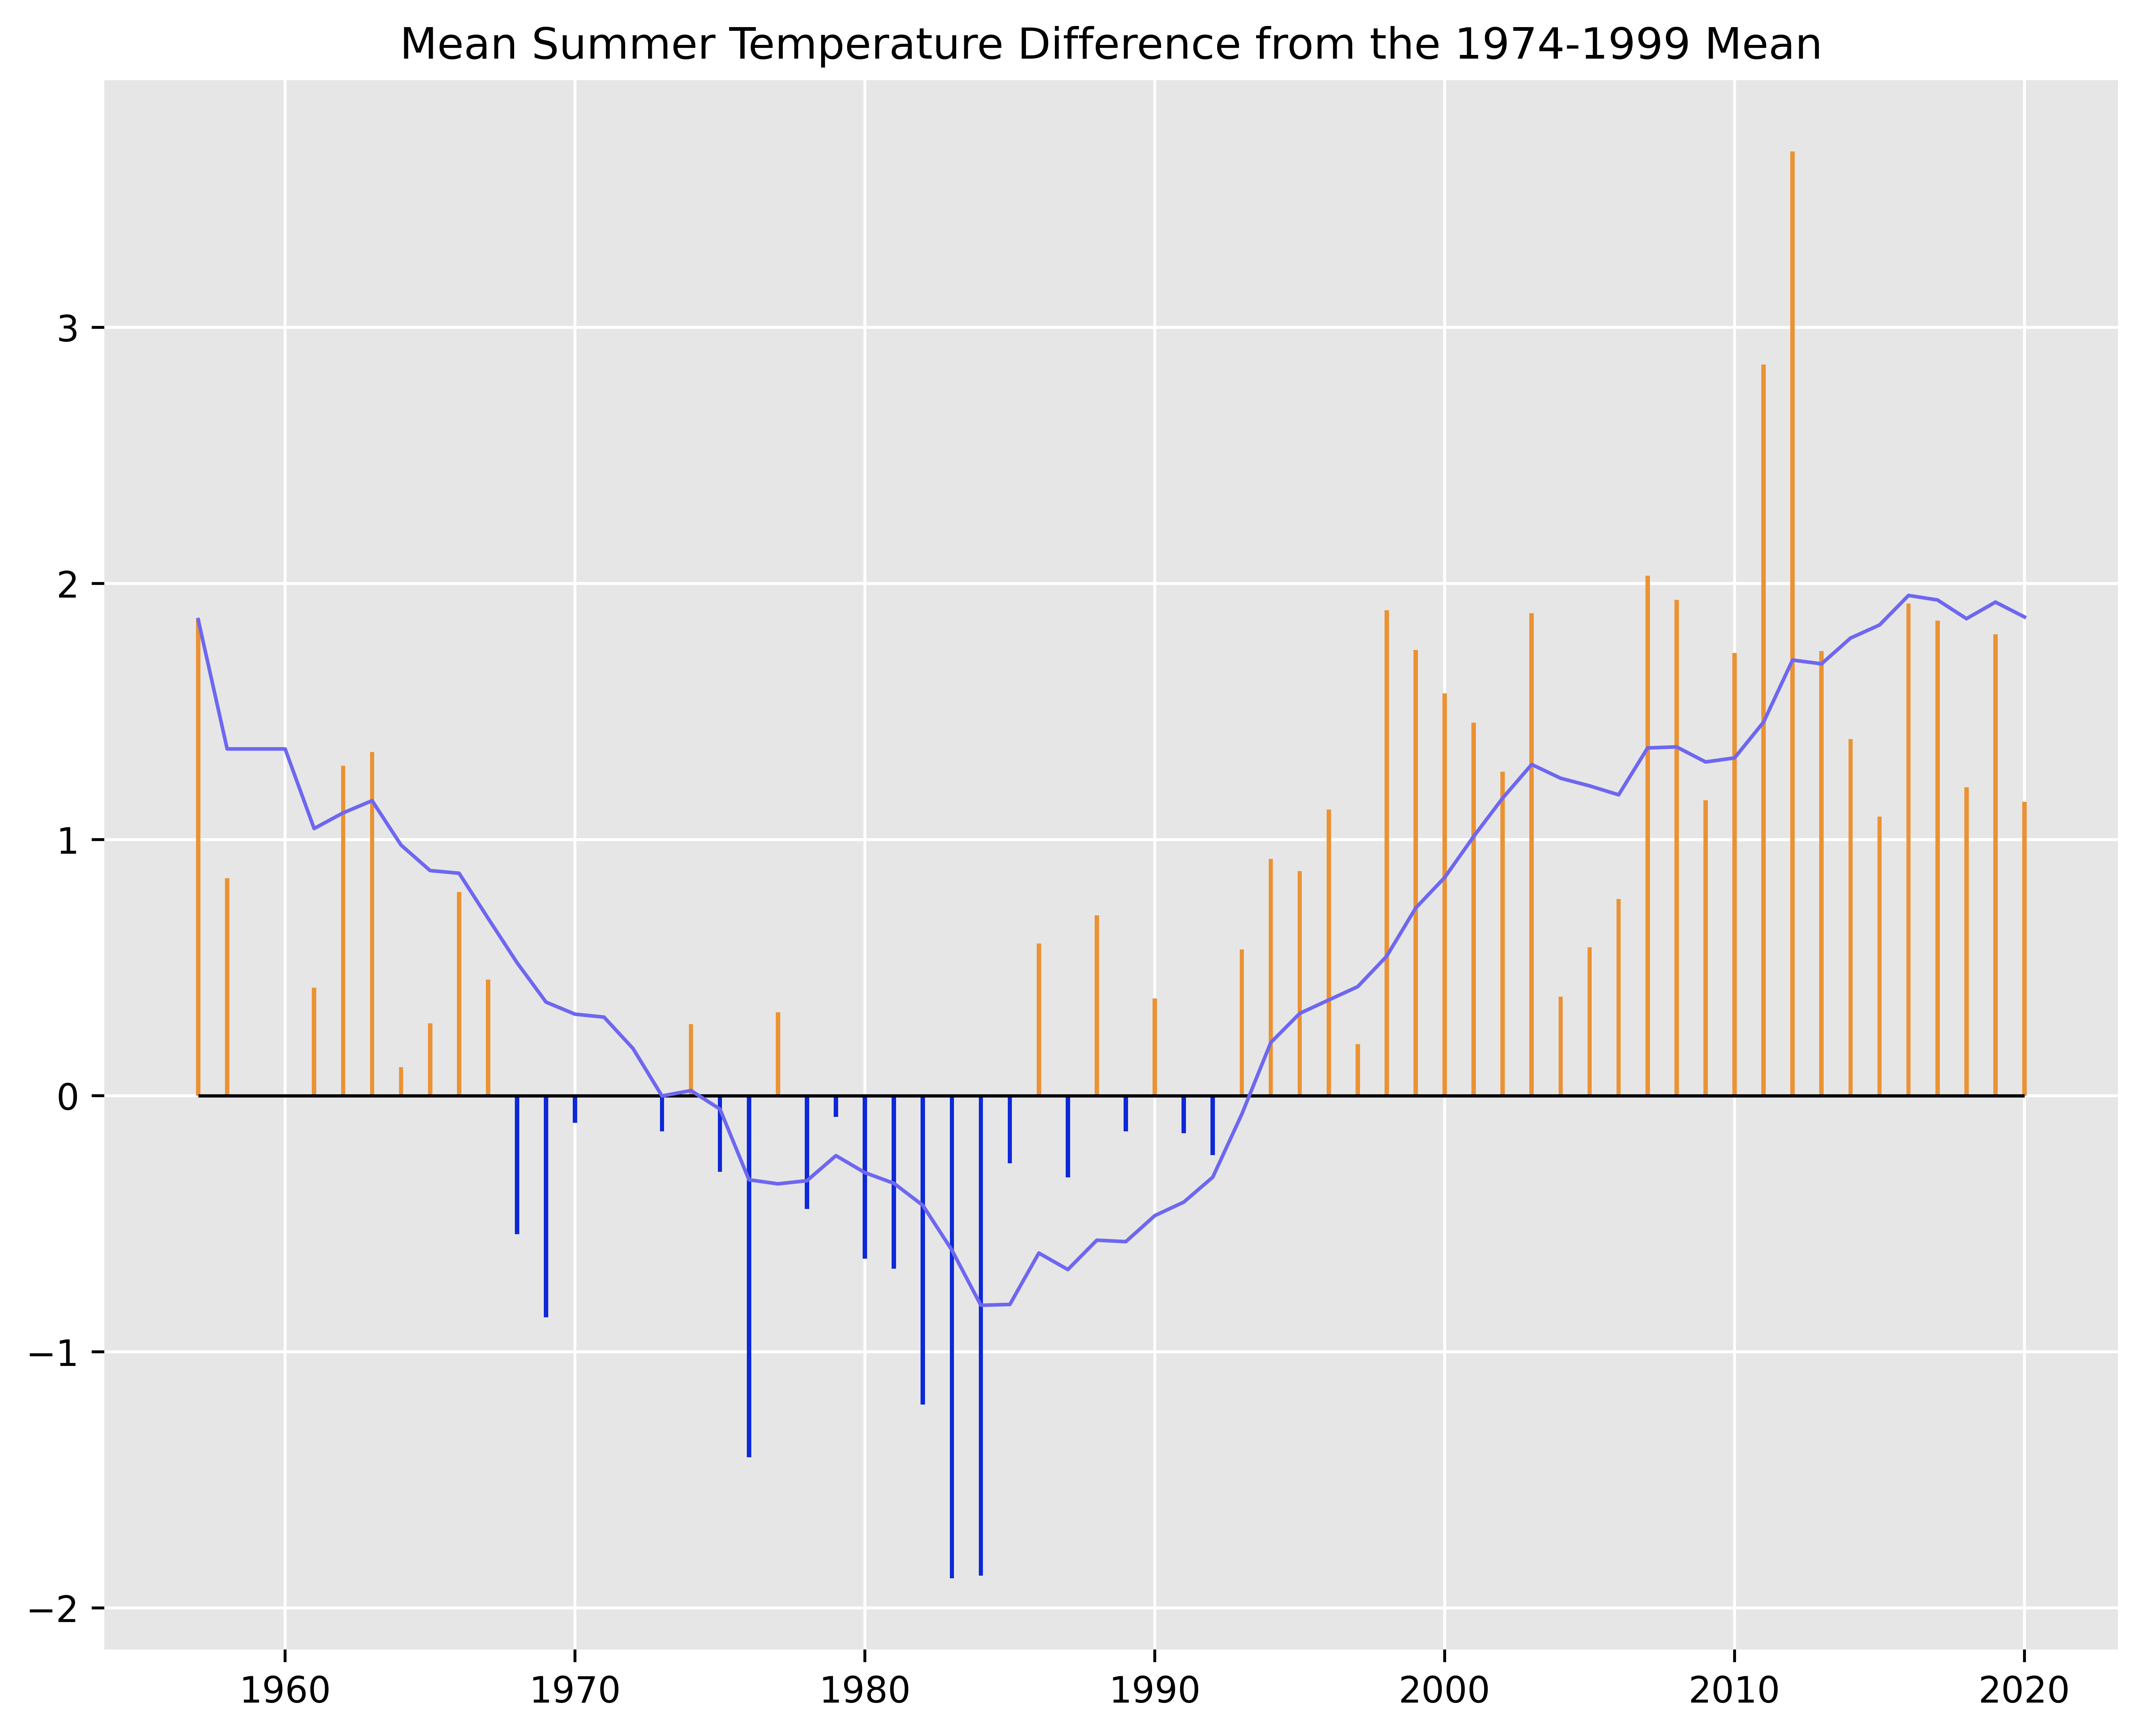

In [173]:
fig = plt.figure(figsize = (10, 8), dpi=700, facecolor='white')
ax= plt.axes()
ax.set_axisbelow(True)
ax.set_facecolor("#E6E6E6")
plt.grid(color='w', linestyle='solid')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.bar(years, final_q2.DEV, color=final_q2.POS.map({True: '#eb9234', False: '#0d28d6'}),
width = 0.15)
plt.plot(years, final_q2.RM, linewidth=1, color= '#6e67f0', ls= "-")
plt.hlines(xmin=1957, xmax=2020, y=0, linewidth=0.9, color='black')
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean")

### Q2 Diagram Interpretation

The plot we created shows the deviation of every year's summer temperature from the 1974-1999 summer temperature mean. As we can see in 2012 the deviation of the average summer temperature from the 1974-1999 summer mean was extremely high. 
It is also worth mentioning that for the most part of 1968-1992 the yearly summer temperature deviation from the 1974-1999 summer mean was negative which states that in that timespan the summer temperatures were lower and in some cases, significantly, from the 1974-1999 mean. 
The overlaying line is the 10 years rolling average of the deviation from the mean which is very important because it provides us with an average line over time, and in this case 10 years, and it smooths the peaks and the valleys to the average over a period of time.

## Q3: Evolution of Daily Temperatures

We are making a copy of our Q1 data in order to perform analysis and leave our initial dataframe intact

In [174]:
q3_data = full_data.copy()
del q3_data['PRCP']

In [175]:
q3_data.reset_index(inplace=True)


We add the columns DATE_DAY, DATE_MONTH, DATE_YEAR to help us with our calculations

In [176]:
q3_data['DATE_DAY']= q3_data.DATE.dt.day
q3_data['DATE_MONTH']= q3_data.DATE.dt.month
q3_data['DATE_YEAR']= q3_data.DATE.dt.year
q3_data

DATE  TAVG  DATE_DAY  DATE_MONTH  DATE_YEAR
0     1955-01-01   NaN         1           1       1955
1     1955-01-02   NaN         2           1       1955
2     1955-01-03   NaN         3           1       1955
3     1955-01-04   NaN         4           1       1955
4     1955-01-05   NaN         5           1       1955
...          ...   ...       ...         ...        ...
24099 2020-12-27  16.6        27          12       2020
24100 2020-12-28  14.8        28          12       2020
24101 2020-12-29  16.3        29          12       2020
24102 2020-12-30  16.4        30          12       2020
24103 2020-12-31  15.4        31          12       2020

[24104 rows x 5 columns]

We add the column RM where we store the 30 days rolling mean that we calculate with the [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) method  

In [177]:
q3_data['RM']= q3_data.TAVG.rolling(window=30, min_periods=1).mean()
q3_data

DATE  TAVG  DATE_DAY  DATE_MONTH  DATE_YEAR         RM
0     1955-01-01   NaN         1           1       1955        NaN
1     1955-01-02   NaN         2           1       1955        NaN
2     1955-01-03   NaN         3           1       1955        NaN
3     1955-01-04   NaN         4           1       1955        NaN
4     1955-01-05   NaN         5           1       1955        NaN
...          ...   ...       ...         ...        ...        ...
24099 2020-12-27  16.6        27          12       2020  14.086667
24100 2020-12-28  14.8        28          12       2020  14.153333
24101 2020-12-29  16.3        29          12       2020  14.153333
24102 2020-12-30  16.4        30          12       2020  14.193333
24103 2020-12-31  15.4        31          12       2020  14.293333

[24104 rows x 6 columns]

In order to calculate the baseline we copy the data that correspond to the dates required and after adding a column DAY_OF_YEAR with [pandas.Series.dt.dayofyear](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofyear.html), we create a pivot table with the function [pandas.DataFrame.pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html?highlight=pivot#pandas.DataFrame.pivot) in order to calculate the mean of every specific day of every month through the years. More specifically, by stating that we want to calculate the mean in axis=1, we end up with 366 values, one mean temperature for each day of the year.

In [178]:
q3_baseline = q3_data.set_index("DATE").loc['1974-01-01': '1999-12-31'].copy()
q3_baseline.reset_index('DATE', inplace=True)
q3_baseline['DAY_OF_YEAR']= q3_baseline.DATE.dt.day_of_year

In [179]:
q3_baseline_pivot = q3_baseline.pivot(index= ['DAY_OF_YEAR'], columns='DATE_YEAR', values='RM')
q3_final_baseline= q3_baseline_pivot.mean(axis=1)
q3_final_baseline

DAY_OF_YEAR
1      11.268205
2      11.223205
3      11.163205
4      11.073205
5      10.987051
         ...    
362    11.560385
363    11.481923
364    11.433590
365    11.385256
366    11.048889
Length: 366, dtype: float64

We follow the same steps for the whole set of our data. When we create the pivot table we want in each column to be stored the average daily temperature of every day for that specific year, smoothed by the 30 days rolling mean. This is why we place the column RM in the values parameter and use as an index the DAY_OF_YEAR. We want each column to show the average temperature throughout the year and this is why the pivot table has 366 rows. 

In [180]:
q3_data['DAY_OF_YEAR']= q3_data.DATE.dt.day_of_year
q3_pivot = q3_data.pivot(index= ['DAY_OF_YEAR'], columns='DATE_YEAR', values='RM')
q3_pivot


DATE_YEAR    1955  1956       1957       1958       1959  1960       1961  \
DAY_OF_YEAR                                                                 
1             NaN   NaN        NaN  11.503333  13.034483   NaN  12.000000   
2             NaN   NaN        NaN  11.770000  13.153571   NaN  12.100000   
3             NaN   NaN        NaN  12.020000  13.300000   NaN  12.600000   
4             NaN   NaN        NaN  12.243333  13.453846   NaN  12.900000   
5             NaN   NaN        NaN  12.346667  13.552000   NaN  13.380000   
...           ...   ...        ...        ...        ...   ...        ...   
362           NaN   NaN  10.636667  12.983333        NaN   NaN  12.766667   
363           NaN   NaN  10.626667  13.086667        NaN   NaN  12.770000   
364           NaN   NaN  10.776667  13.130000        NaN   NaN  12.676667   
365           NaN   NaN  11.160000  13.036667        NaN   NaN  12.526667   
366           NaN   NaN        NaN        NaN        NaN   NaN        NaN   

DATE_YEAR         1962       1963       1964  ...       2011       2012  \
DAY_OF_YEAR                                   ...                         
1            12.366667  11.560000  13.426667  ...  13.093333  12.683333   
2            12.283333  11.630000  13.430000  ...  12.806667  12.560000   
3            12.320000  11.703333  13.326667  ...  12.530000  12.426667   
4            12.220000  11.920000  13.110000  ...  12.410000  12.266667   
5            12.033333  12.110000  12.800000  ...  12.340000  12.020000   
...                ...        ...        ...  ...        ...        ...   
362          11.543333  13.956667  13.536667  ...  12.966667  12.320000   
363          11.413333  13.733333  13.476667  ...  12.793333  12.180000   
364          11.386667  13.583333  13.276667  ...  12.763333  11.943333   
365          11.450000  13.473333  13.096667  ...  12.746667  11.666667   
366                NaN        NaN  12.943333  ...        NaN  11.483333   

DATE_YEAR         2013       2014       2015       2016       2017       2018  \
DAY_OF_YEAR                                                                     
1            11.316667  10.473333  12.626667  10.896667   8.996667  11.960000   
2            11.186667  10.516667  12.116667  10.670000   8.806667  11.806667   
3            11.216667  10.620000  11.746667  10.600000   8.726667  11.693333   
4            11.190000  10.676667  11.580000  10.650000   8.730000  11.650000   
5            11.143333  10.713333  11.223333  10.820000   8.830000  11.710000   
...                ...        ...        ...        ...        ...        ...   
362          10.853333  13.990000  11.803333   9.983333  12.676667  10.710000   
363          10.910000  13.900000  11.703333   9.723333  12.693333  10.733333   
364          10.880000  13.483333  11.616667   9.466667  12.493333  10.796667   
365          10.673333  13.090000  11.260000   9.310000  12.210000  10.803333   
366                NaN        NaN        NaN   9.183333        NaN        NaN   

DATE_YEAR         2019       2020  
DAY_OF_YEAR                        
1            10.713333  12.340000  
2            10.606667  12.106667  
3            10.446667  11.983333  
4            10.210000  11.960000  
5            10.020000  11.916667  
...                ...        ...  
362          13.613333  14.086667  
363          13.160000  14.153333  
364          12.700000  14.153333  
365          12.443333  14.193333  
366                NaN  14.293333  

[366 rows x 66 columns]

In [181]:
q3_pivot.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            357, 358, 359, 360, 361, 362, 363, 364, 365, 366],
           dtype='int64', name='DAY_OF_YEAR', length=366)

Text(0.5, 1.0, 'Extreme Temperature Events')

<Figure size 7000x5600 with 0 Axes>

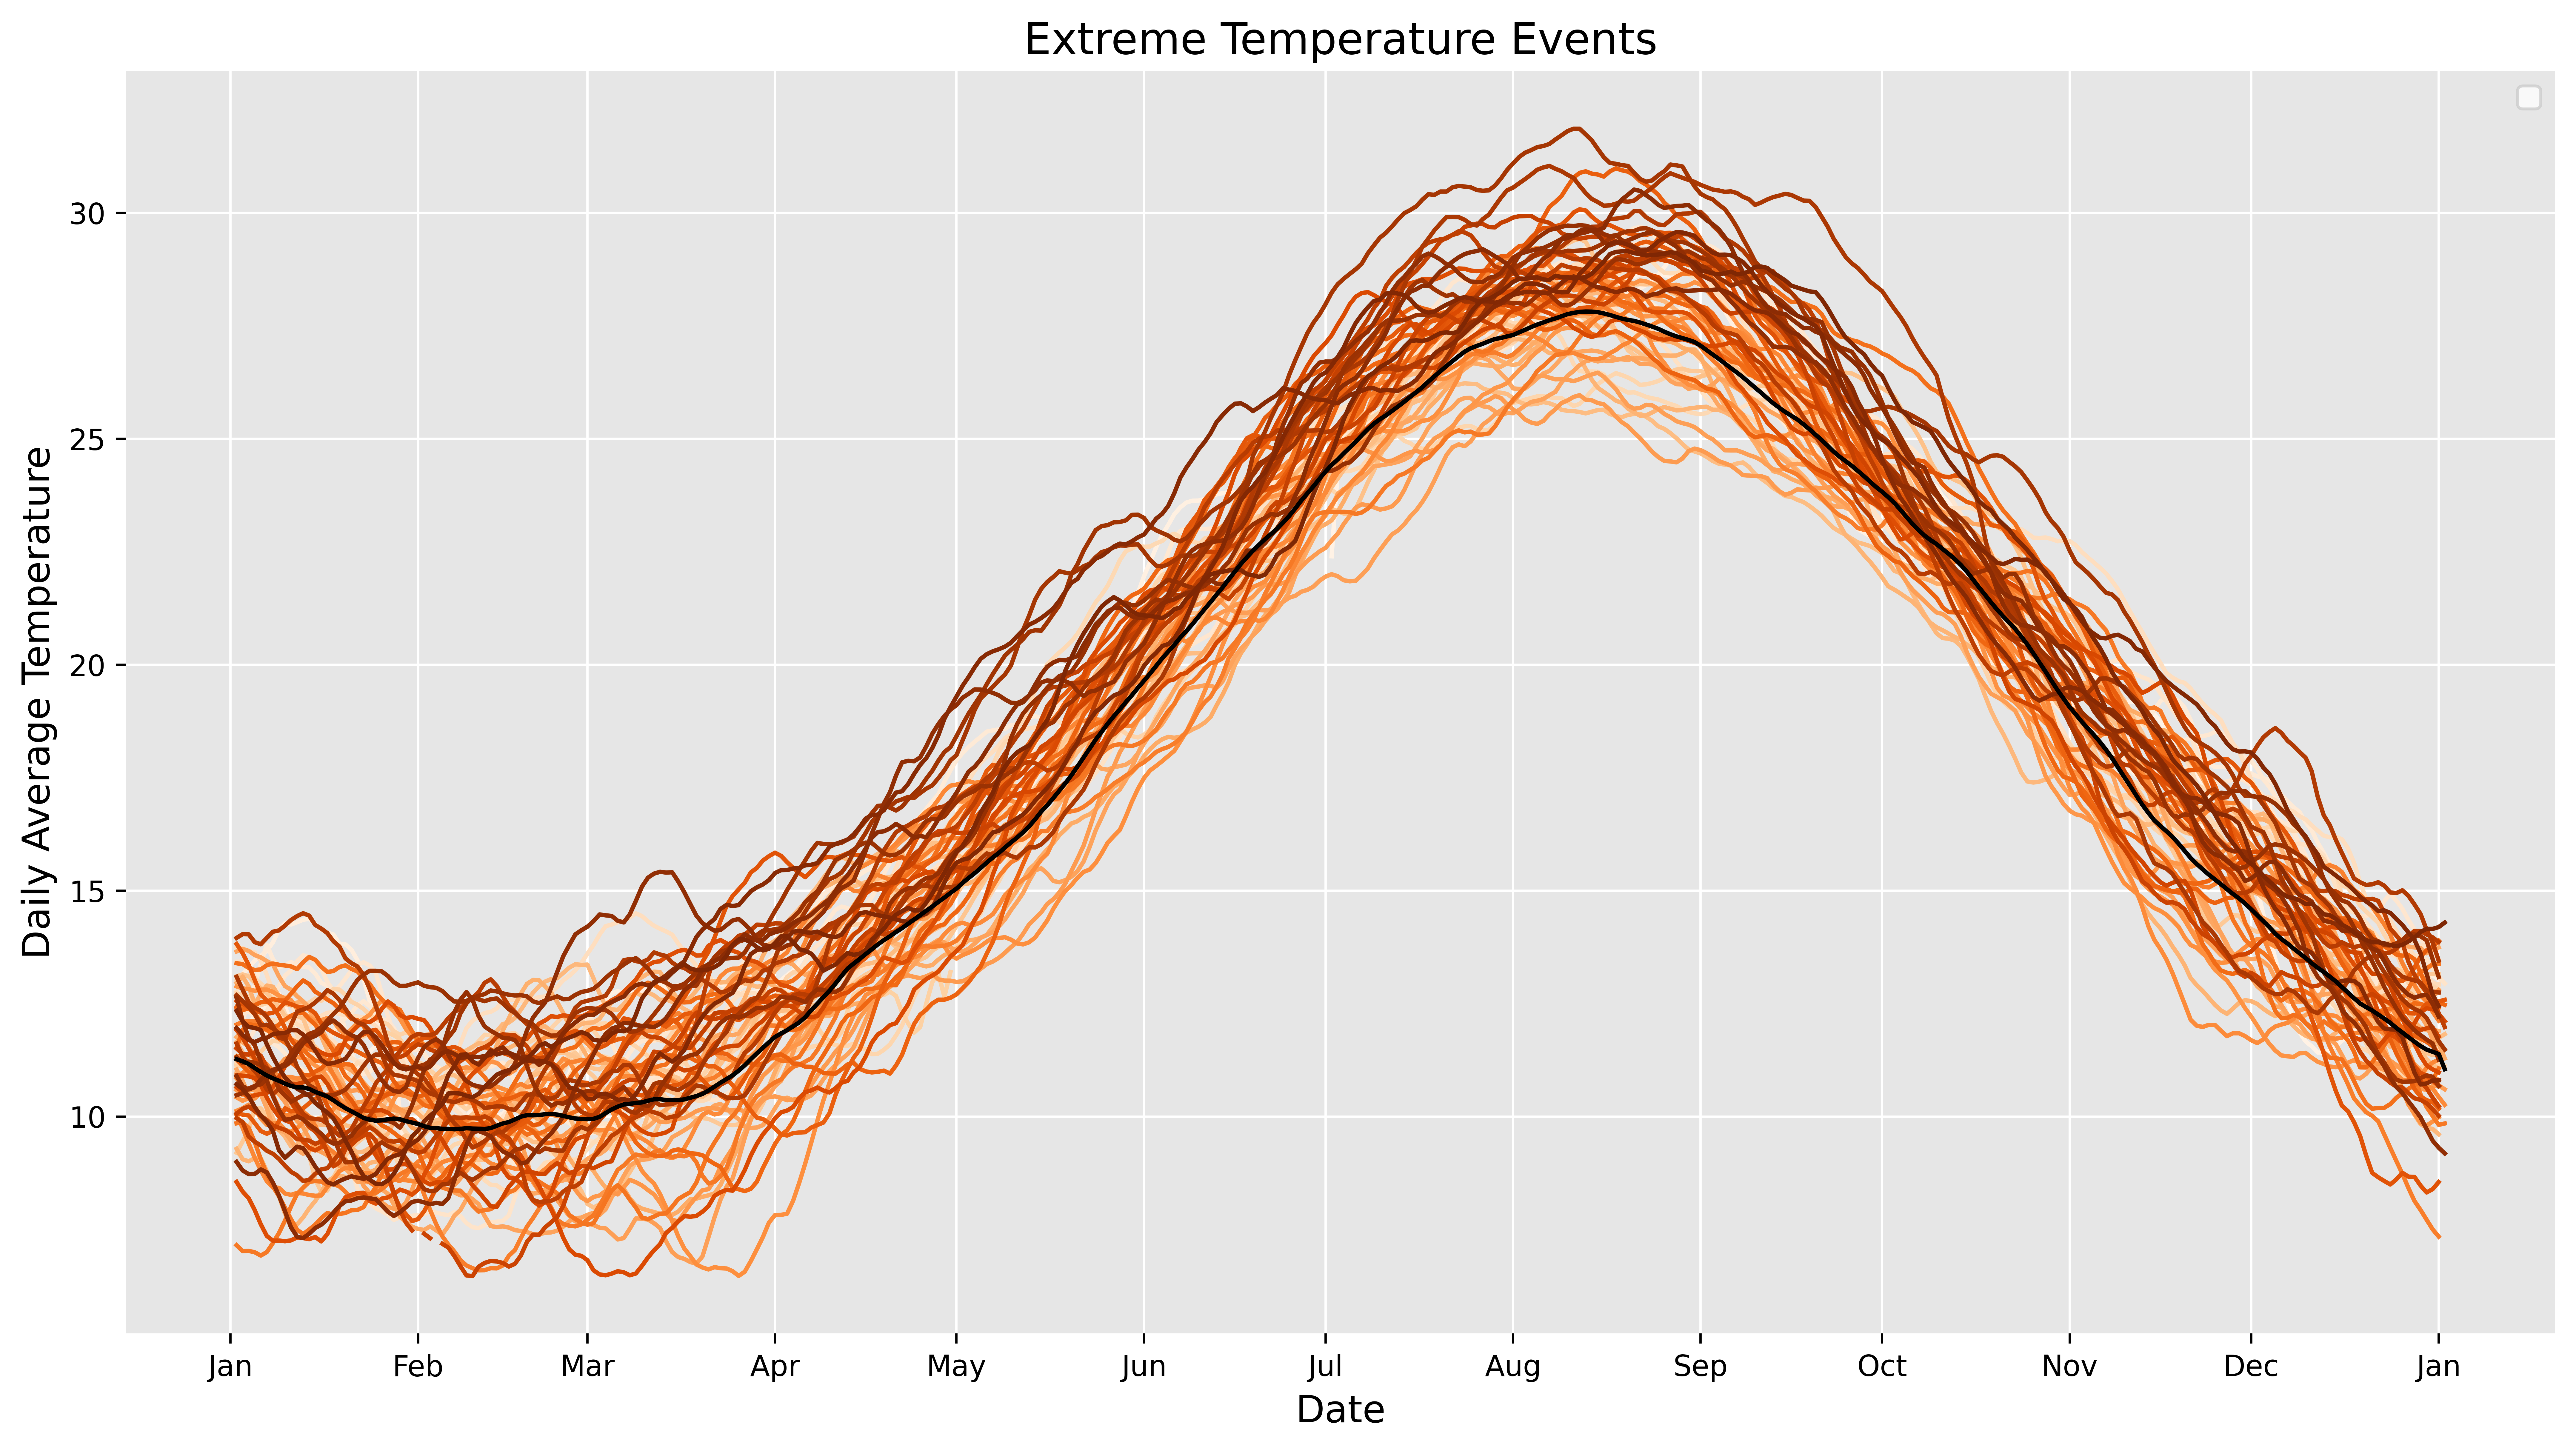

In [182]:
fig = plt.figure(figsize = (10, 8), dpi=700, facecolor='white')
plt.rcParams["figure.dpi"] = 700
ax= q3_pivot.plot(use_index=True, figsize = (12,8), cmap='Oranges')
ax= q3_final_baseline.plot(use_index=True, figsize = (15,8), color='black')
ax.set_axisbelow(True)
ax.set_facecolor("#E6E6E6")
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%b"))
plt.grid(color='w', linestyle='solid')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.legend('')
plt.xlabel("Date", fontsize= 13)
plt.ylabel("Daily Average Temperature", fontsize= 13)
plt.title("Extreme Temperature Events", fontsize= 15)

### Q3 Diagram Interpretation 
The plot we created displays the average daily temperature for every year for the timespan of 1955-2020. Each line has been smoothed by a 30 days rolling mean which provides us with an average for each line over time, and it smooths the peaks and the valleys to the average over a period of 30 days. The hue of the orange colour symbolizes our progress through the years in ascending order. 
Generally, it is displayed that from the month of April the average daily temperature starts increasing, then from July to the end of August stays high and from October it starts decreasing again until December where it reaches its lowest point. 
As we can observe, the curve is more smooth for the years in lighter orange (earlier years), compared to the years in darker orange (latest years). This difference becomes more apparent from June to mid September where we can clearly see the light orange lines set completely apart from the darker orange lines. This means that as the years pass by, the average daily temperature is increasing and this phenomenon is more intense in the summer period. 
Moreover, as we can see the measurements of the temperature in the latest years seem to exceed the average daily temperature for the baseline period of 1974-1999, which is also very clear in the summer months. 

## Q4: Extreme Temperature Events

We are making a copy of our Q1 data in order to perform analysis and leave our initial dataframe intact

In [183]:
q4_data = full_data.copy()
del q4_data['PRCP']
q4_baseline = q4_data.loc['1974-01-01': '1999-12-31'].copy()
q4_data


TAVG
DATE            
1955-01-01   NaN
1955-01-02   NaN
1955-01-03   NaN
1955-01-04   NaN
1955-01-05   NaN
...          ...
2020-12-27  16.6
2020-12-28  14.8
2020-12-29  16.3
2020-12-30  16.4
2020-12-31  15.4

[24104 rows x 1 columns]

In [184]:
q4_baseline

TAVG
DATE            
1974-01-01  11.6
1974-01-02  13.7
1974-01-03  12.2
1974-01-04  10.8
1974-01-05   9.6
...          ...
1999-12-27  15.4
1999-12-28  16.9
1999-12-29  15.1
1999-12-30  13.4
1999-12-31  14.9

[9496 rows x 1 columns]

In [185]:
q4_baseline.reset_index(inplace=True)
q4_data.reset_index(inplace=True)

In [186]:
q4_baseline['DATE_DAY']= q4_data.DATE.dt.day
q4_baseline['DATE_MONTH'] = q4_data.DATE.dt.month
q4_baseline

DATE  TAVG  DATE_DAY  DATE_MONTH
0    1974-01-01  11.6         1           1
1    1974-01-02  13.7         2           1
2    1974-01-03  12.2         3           1
3    1974-01-04  10.8         4           1
4    1974-01-05   9.6         5           1
...         ...   ...       ...         ...
9491 1999-12-27  15.4        26          12
9492 1999-12-28  16.9        27          12
9493 1999-12-29  15.1        28          12
9494 1999-12-30  13.4        29          12
9495 1999-12-31  14.9        30          12

[9496 rows x 4 columns]

In order to calculate the baseline we try a different method than what we did in Q3. We copy the data that correspond to the dates required, in the dataframe q4_baseline and we group them by month and day to calculate the mean temperature for every day of the year for the timespan 1974-1999
* We want to have one value for every day of the year and this is why we have 366 rows

In [187]:
q4_bgrouped= q4_baseline.groupby(['DATE_MONTH','DATE_DAY']).mean()
q4_bgrouped

TAVG
DATE_MONTH DATE_DAY           
1          1         10.596154
           2         10.857692
           3          9.853846
           4          9.373077
           5         10.042308
...                        ...
12         27         9.984615
           28        10.246154
           29        10.730769
           30        11.500000
           31        10.736000

[366 rows x 1 columns]

Next step is to raise the values by 10% to use them as our criteria in order to count the number of the extreme temperature events

In [188]:
q4_bgrouped['TAVG'] = q4_bgrouped['TAVG'] * 1.1
q4_bgrouped

TAVG
DATE_MONTH DATE_DAY           
1          1         11.655769
           2         11.943462
           3         10.839231
           4         10.310385
           5         11.046538
...                        ...
12         27        10.983077
           28        11.270769
           29        11.803846
           30        12.650000
           31        11.809600

[366 rows x 1 columns]

In [189]:
q4_bgrouped.reset_index(inplace=True)
q4_bgrouped

DATE_MONTH  DATE_DAY       TAVG
0             1         1  11.655769
1             1         2  11.943462
2             1         3  10.839231
3             1         4  10.310385
4             1         5  11.046538
..          ...       ...        ...
361          12        27  10.983077
362          12        28  11.270769
363          12        29  11.803846
364          12        30  12.650000
365          12        31  11.809600

[366 rows x 3 columns]

We want to merge the q4_baseline data dataframe which contains the everyday temperature of the timespan 1974-1999 with our q4_bgrouped data which includes the temperature criteria for an extreme event.
* This way, we will have the daily temperature and the baseline temperature so that we can compare them and understand whether we had an extreme temperature event that day or not
* With this merge we have in every row, based on the day and month, the corresponding average temperature of that specific day of the year of the baseline, raised by 10% 

In [190]:
merged_q4_baseline = q4_baseline.merge(q4_bgrouped, how='left', on=["DATE_MONTH", "DATE_DAY"], suffixes=('_ACT', '_EXT'))
merged_q4_baseline

DATE  TAVG_ACT  DATE_DAY  DATE_MONTH   TAVG_EXT
0    1974-01-01      11.6         1           1  11.655769
1    1974-01-02      13.7         2           1  11.943462
2    1974-01-03      12.2         3           1  10.839231
3    1974-01-04      10.8         4           1  10.310385
4    1974-01-05       9.6         5           1  11.046538
...         ...       ...       ...         ...        ...
9491 1999-12-27      15.4        26          12  11.050769
9492 1999-12-28      16.9        27          12  10.983077
9493 1999-12-29      15.1        28          12  11.270769
9494 1999-12-30      13.4        29          12  11.803846
9495 1999-12-31      14.9        30          12  12.650000

[9496 rows x 5 columns]

* We add another column EXT in our merged_q4_dataframe in order to store for every day whether there was an extreme temperature event
* We compare each daily temperature (TAVG_ACT), with the corresponding criteria, and if the daily temperature is higher than our criteria, we will store True, if not, False

In [191]:
merged_q4_baseline['EXT']= merged_q4_baseline['TAVG_ACT'] > merged_q4_baseline['TAVG_EXT']
merged_q4_baseline['DATE_YEAR']= merged_q4_baseline.DATE.dt.year
merged_q4_baseline

DATE  TAVG_ACT  DATE_DAY  DATE_MONTH   TAVG_EXT    EXT  DATE_YEAR
0    1974-01-01      11.6         1           1  11.655769  False       1974
1    1974-01-02      13.7         2           1  11.943462   True       1974
2    1974-01-03      12.2         3           1  10.839231   True       1974
3    1974-01-04      10.8         4           1  10.310385   True       1974
4    1974-01-05       9.6         5           1  11.046538  False       1974
...         ...       ...       ...         ...        ...    ...        ...
9491 1999-12-27      15.4        26          12  11.050769   True       1999
9492 1999-12-28      16.9        27          12  10.983077   True       1999
9493 1999-12-29      15.1        28          12  11.270769   True       1999
9494 1999-12-30      13.4        29          12  11.803846   True       1999
9495 1999-12-31      14.9        30          12  12.650000   True       1999

[9496 rows x 7 columns]

* In order to calculate all extreme temperature events we count all True values in the EXT column 

In [192]:
total_extreme_events = merged_q4_baseline.EXT.sum()
total_extreme_events

2329

* Then, we count the total number of temperatures we have 

In [193]:
num= merged_q4_baseline.groupby("DATE_YEAR").TAVG_ACT.count().sum()
num

9487

* We calculate the average number of extreme tempearture events of the baseline by dividing the total extreme events with the total number of daily temperatures we have

In [194]:
average_ext_baseline = total_extreme_events / num
average_ext_baseline

0.24549383366712343

In [195]:
q4_data['DATE_DAY']= q4_data.DATE.dt.day
q4_data['DATE_MONTH'] = q4_data.DATE.dt.month
q4_data

DATE  TAVG  DATE_DAY  DATE_MONTH
0     1955-01-01   NaN         1           1
1     1955-01-02   NaN         2           1
2     1955-01-03   NaN         3           1
3     1955-01-04   NaN         4           1
4     1955-01-05   NaN         5           1
...          ...   ...       ...         ...
24099 2020-12-27  16.6        27          12
24100 2020-12-28  14.8        28          12
24101 2020-12-29  16.3        29          12
24102 2020-12-30  16.4        30          12
24103 2020-12-31  15.4        31          12

[24104 rows x 4 columns]

Then we follow the same methodology for all our data in order to calculate the average number of extreme events per year

In [196]:
merged_q4 = q4_data.merge(q4_bgrouped, how='left', on=["DATE_MONTH", "DATE_DAY"], suffixes=('_ACT', '_EXT'))
merged_q4

DATE  TAVG_ACT  DATE_DAY  DATE_MONTH   TAVG_EXT
0     1955-01-01       NaN         1           1  11.655769
1     1955-01-02       NaN         2           1  11.943462
2     1955-01-03       NaN         3           1  10.839231
3     1955-01-04       NaN         4           1  10.310385
4     1955-01-05       NaN         5           1  11.046538
...          ...       ...       ...         ...        ...
24099 2020-12-27      16.6        27          12  10.983077
24100 2020-12-28      14.8        28          12  11.270769
24101 2020-12-29      16.3        29          12  11.803846
24102 2020-12-30      16.4        30          12  12.650000
24103 2020-12-31      15.4        31          12  11.809600

[24104 rows x 5 columns]

In [197]:
merged_q4['EXT']= merged_q4['TAVG_ACT'] > merged_q4['TAVG_EXT']
merged_q4['DATE_YEAR']= merged_q4.DATE.dt.year
merged_q4

DATE  TAVG_ACT  DATE_DAY  DATE_MONTH   TAVG_EXT    EXT  DATE_YEAR
0     1955-01-01       NaN         1           1  11.655769  False       1955
1     1955-01-02       NaN         2           1  11.943462  False       1955
2     1955-01-03       NaN         3           1  10.839231  False       1955
3     1955-01-04       NaN         4           1  10.310385  False       1955
4     1955-01-05       NaN         5           1  11.046538  False       1955
...          ...       ...       ...         ...        ...    ...        ...
24099 2020-12-27      16.6        27          12  10.983077   True       2020
24100 2020-12-28      14.8        28          12  11.270769   True       2020
24101 2020-12-29      16.3        29          12  11.803846   True       2020
24102 2020-12-30      16.4        30          12  12.650000   True       2020
24103 2020-12-31      15.4        31          12  11.809600   True       2020

[24104 rows x 7 columns]

In [198]:
final_q4 = merged_q4.groupby(['DATE_YEAR']).sum()
final_q4

TAVG_ACT  DATE_DAY  DATE_MONTH     TAVG_EXT  EXT
DATE_YEAR                                                  
1955            0.0      5738        2382  7169.706077    0
1956            0.0      5767        2384  7181.664648    0
1957         3914.0      5738        2382  7169.706077   50
1958         6829.5      5738        2382  7169.706077  132
1959            0.0      5738        2382  7169.706077    0
...             ...       ...         ...          ...  ...
2016         7090.2      5767        2384  7181.664648  158
2017         7001.2      5738        2382  7169.706077  167
2018         7121.9      5738        2382  7169.706077  171
2019         7015.2      5738        2382  7169.706077  163
2020         7069.0      5767        2384  7181.664648  174

[66 rows x 5 columns]

* We calculate the average number of extreme tempearture events per year by dividing the total extreme events per year with the total number of daily temperatures per year we have and we store it in a new column called RATIO


In [199]:
final_q4['NUM']= merged_q4.groupby("DATE_YEAR").TAVG_ACT.count() 
final_q4['RATIO'] = final_q4.EXT / final_q4.NUM

Plot preparation: 
* We add another column called UNDER in our final_q2 dataframe where we store whether the RATIO value of each year is under or beyond the baseline in order to paint it accordingly

In [200]:
final_q4['UNDER'] = final_q4.RATIO < average_ext_baseline
final_q4

TAVG_ACT  DATE_DAY  DATE_MONTH     TAVG_EXT  EXT  NUM     RATIO  \
DATE_YEAR                                                                    
1955            0.0      5738        2382  7169.706077    0    0       NaN   
1956            0.0      5767        2384  7181.664648    0    0       NaN   
1957         3914.0      5738        2382  7169.706077   50  184  0.271739   
1958         6829.5      5738        2382  7169.706077  132  365  0.361644   
1959            0.0      5738        2382  7169.706077    0    0       NaN   
...             ...       ...         ...          ...  ...  ...       ...   
2016         7090.2      5767        2384  7181.664648  158  366  0.431694   
2017         7001.2      5738        2382  7169.706077  167  365  0.457534   
2018         7121.9      5738        2382  7169.706077  171  365  0.468493   
2019         7015.2      5738        2382  7169.706077  163  365  0.446575   
2020         7069.0      5767        2384  7181.664648  174  366  0.475410   

           UNDER  
DATE_YEAR         
1955       False  
1956       False  
1957       False  
1958       False  
1959       False  
...          ...  
2016       False  
2017       False  
2018       False  
2019       False  
2020       False  

[66 rows x 8 columns]

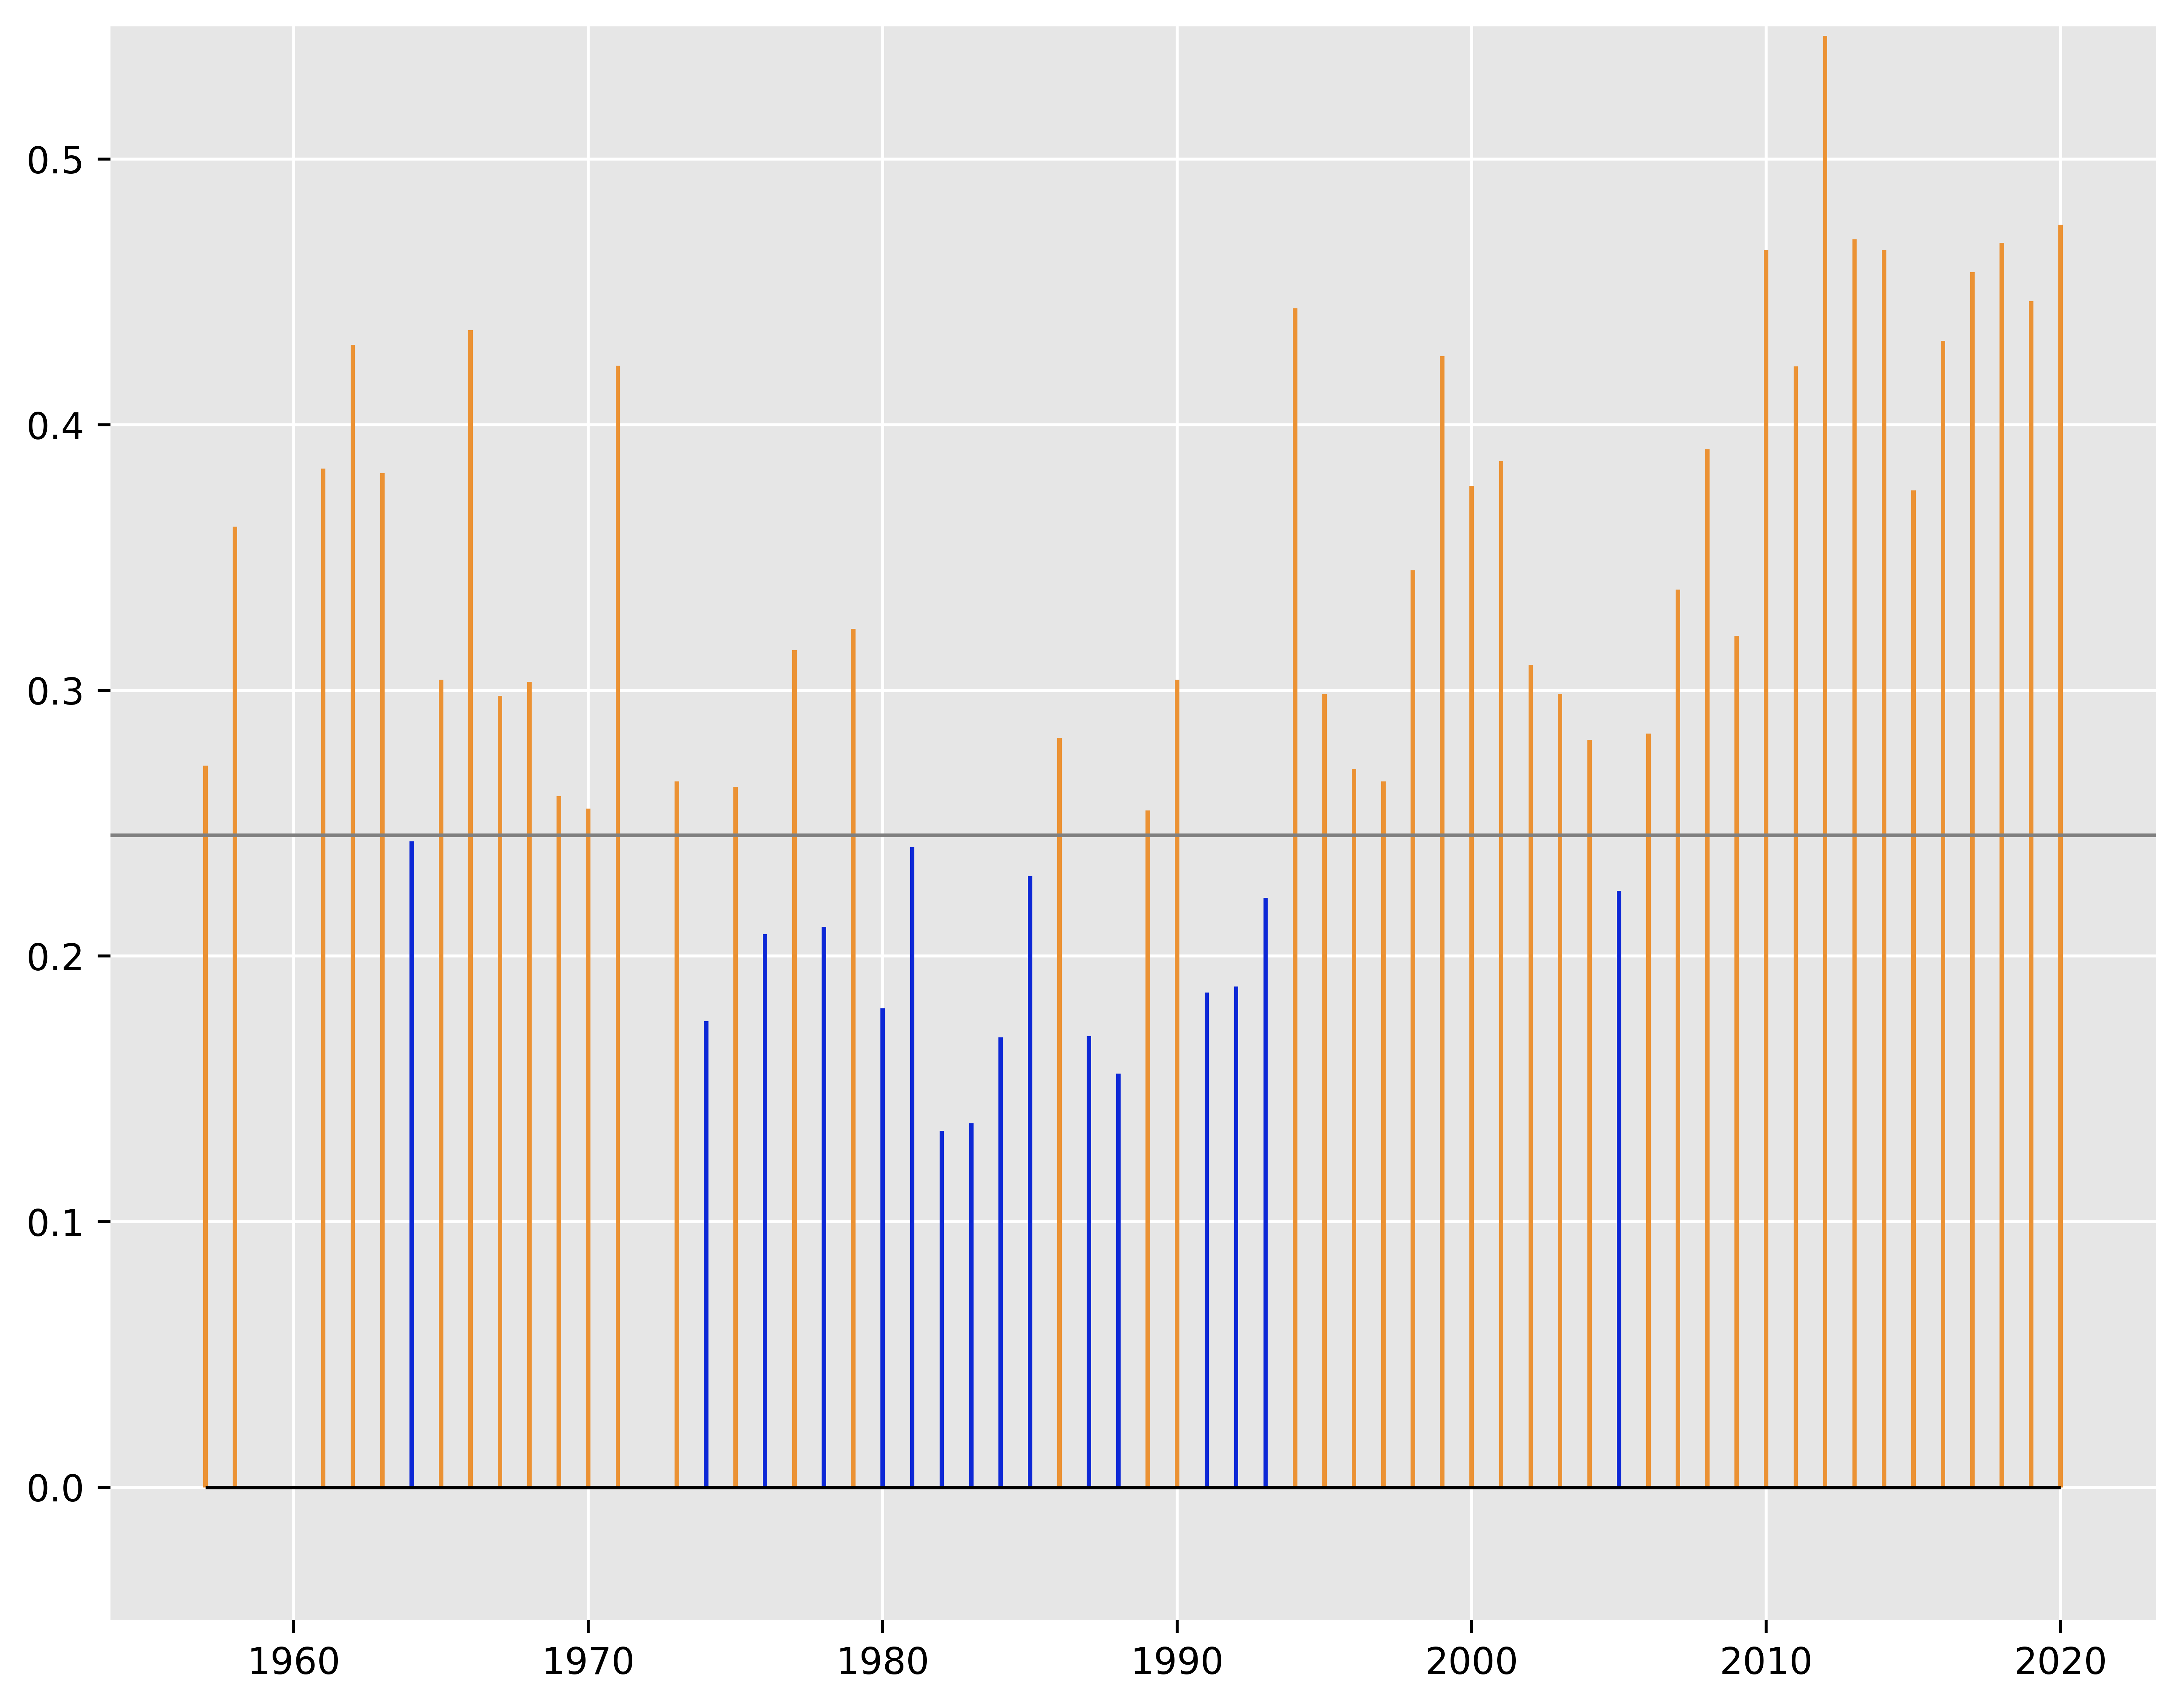

In [201]:
fig = plt.figure(figsize = (10, 8), dpi=700, facecolor='white')
ax= plt.axes()
ax.set_axisbelow(True)
ax.set_facecolor("#E6E6E6")
plt.grid(color='w', linestyle='solid')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.bar(years, final_q4.RATIO, align='center',color=final_q4.UNDER.map({True: '#0d28d6', False: '#eb9234'}), 
width=0.15)
plt.ylim(-0.05,0.55)
plt.axhline(y=average_ext_baseline, linewidth=1, color='grey')
plt.hlines(xmin=1957, xmax=2020, y=0, linewidth=0.9, color='black')

### Q4 Diagram Interpretation
The plot we created shows the ratio of extreme temperature events per year over the yearly temperature observations. The gray line in the middle depicts the average number of extreme tempearture events of the baseline. If a ratio is higher than the baseline it is coloured orange, otherwise it coloured blue. As we can see for most years, the ratio is higher than the baseline, which means that we have a fair number of extreme temperature events. After 2010, the extreme temperature events are stabilized in a higher ratio whereas in the timespan of 1974-1993 the ratio of extreme events is lower that the average number of extreme tempearture events of the baseline.

## Q5: Precipitation

We are making a copy of our q1 data in order to perform analysis and leave our initial dataframe intact

In [202]:
q5_data = full_data.copy()
q5_data

PRCP  TAVG
DATE                  
1955-01-01   0.0   NaN
1955-01-02   2.0   NaN
1955-01-03   0.0   NaN
1955-01-04   0.0   NaN
1955-01-05   0.0   NaN
...          ...   ...
2020-12-27   0.0  16.6
2020-12-28   6.6  14.8
2020-12-29   0.0  16.3
2020-12-30   0.0  16.4
2020-12-31   0.0  15.4

[24104 rows x 2 columns]

In [203]:
q5_data.reset_index(inplace=True)
q5_data


DATE  PRCP  TAVG
0     1955-01-01   0.0   NaN
1     1955-01-02   2.0   NaN
2     1955-01-03   0.0   NaN
3     1955-01-04   0.0   NaN
4     1955-01-05   0.0   NaN
...          ...   ...   ...
24099 2020-12-27   0.0  16.6
24100 2020-12-28   6.6  14.8
24101 2020-12-29   0.0  16.3
24102 2020-12-30   0.0  16.4
24103 2020-12-31   0.0  15.4

[24104 rows x 3 columns]

We add the column DATE_YEAR in our dataframe to help us with our calculations

In [204]:
q5_data['DATE_YEAR']= q5_data.DATE.dt.year
q5_data

DATE  PRCP  TAVG  DATE_YEAR
0     1955-01-01   0.0   NaN       1955
1     1955-01-02   2.0   NaN       1955
2     1955-01-03   0.0   NaN       1955
3     1955-01-04   0.0   NaN       1955
4     1955-01-05   0.0   NaN       1955
...          ...   ...   ...        ...
24099 2020-12-27   0.0  16.6       2020
24100 2020-12-28   6.6  14.8       2020
24101 2020-12-29   0.0  16.3       2020
24102 2020-12-30   0.0  16.4       2020
24103 2020-12-31   0.0  15.4       2020

[24104 rows x 4 columns]

First, we intend to calculate the total precipitation of every year, so we group our data by the column DATE_YEAR and then we use the function sum(). We then store the results in a new dataframe q5_grouped

In [205]:
q5_grouped = q5_data.groupby("DATE_YEAR").sum()
q5_grouped

PRCP    TAVG
DATE_YEAR               
1955       547.0     0.0
1956       281.3     0.0
1957       303.2  3914.0
1958       350.0  6829.5
1959       214.0     0.0
...          ...     ...
2016       261.6  7090.2
2017       304.3  7001.2
2018       380.2  7121.9
2019       570.0  7015.2
2020       210.4  7069.0

[66 rows x 2 columns]

* To calculate the number of raining days we use the criteria which entails that in order a day to be included in the raining days, the corresponding precipitation must be higher than zero
* So, we first find the data that pass this criteria and then we group them by year in order to count them and then we store the results in a new dataframe called raining_days

In [206]:
raining_days= q5_data[q5_data['PRCP'] > 0].groupby("DATE_YEAR").count()
raining_days

DATE  PRCP  TAVG
DATE_YEAR                  
1955         68    68     0
1956         52    52     0
1957         73    73    37
1958         68    68    68
1959         62    62     0
...         ...   ...   ...
2016         42    42    42
2017         48    48    48
2018         55    55    55
2019         58    58    58
2020         38    38    38

[66 rows x 3 columns]

* In order to calculate the rainfall ratio we need to divide the total rainfall of each year with the number of rainy days of that specific year
* We join the two dataframes that we created, the q5_grouped, containing the yearly total rainfall and the raining_days containing the yearly number of rainy days
* We use the [pandas.DataFrame.join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join) method, stating that we want to do an inner join and adding a suffix so as to understand the representation of the PRCP columns that were named the same

In [207]:
final_q5= q5_grouped.join(raining_days, how='left', lsuffix='_TOTAL', rsuffix='_DAYS')
final_q5

PRCP_TOTAL  TAVG_TOTAL  DATE  PRCP_DAYS  TAVG_DAYS
DATE_YEAR                                                    
1955            547.0         0.0    68         68          0
1956            281.3         0.0    52         52          0
1957            303.2      3914.0    73         73         37
1958            350.0      6829.5    68         68         68
1959            214.0         0.0    62         62          0
...               ...         ...   ...        ...        ...
2016            261.6      7090.2    42         42         42
2017            304.3      7001.2    48         48         48
2018            380.2      7121.9    55         55         55
2019            570.0      7015.2    58         58         58
2020            210.4      7069.0    38         38         38

[66 rows x 5 columns]

We calculate the rainfall ration and store it in the column RATIO

In [208]:
final_q5['RATIO']= final_q5.PRCP_TOTAL / final_q5.PRCP_DAYS
final_q5

PRCP_TOTAL  TAVG_TOTAL  DATE  PRCP_DAYS  TAVG_DAYS     RATIO
DATE_YEAR                                                              
1955            547.0         0.0    68         68          0  8.044118
1956            281.3         0.0    52         52          0  5.409615
1957            303.2      3914.0    73         73         37  4.153425
1958            350.0      6829.5    68         68         68  5.147059
1959            214.0         0.0    62         62          0  3.451613
...               ...         ...   ...        ...        ...       ...
2016            261.6      7090.2    42         42         42  6.228571
2017            304.3      7001.2    48         48         48  6.339583
2018            380.2      7121.9    55         55         55  6.912727
2019            570.0      7015.2    58         58         58  9.827586
2020            210.4      7069.0    38         38         38  5.536842

[66 rows x 6 columns]

The last step before creating the diagram is to calculate the 10 years rolling mean with the [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) method and store it in our dataframe

In [209]:
final_q5['RM'] = final_q5['RATIO'].rolling(window=10, min_periods=1).mean()
final_q5

PRCP_TOTAL  TAVG_TOTAL  DATE  PRCP_DAYS  TAVG_DAYS     RATIO  \
DATE_YEAR                                                                 
1955            547.0         0.0    68         68          0  8.044118   
1956            281.3         0.0    52         52          0  5.409615   
1957            303.2      3914.0    73         73         37  4.153425   
1958            350.0      6829.5    68         68         68  5.147059   
1959            214.0         0.0    62         62          0  3.451613   
...               ...         ...   ...        ...        ...       ...   
2016            261.6      7090.2    42         42         42  6.228571   
2017            304.3      7001.2    48         48         48  6.339583   
2018            380.2      7121.9    55         55         55  6.912727   
2019            570.0      7015.2    58         58         58  9.827586   
2020            210.4      7069.0    38         38         38  5.536842   

                 RM  
DATE_YEAR            
1955       8.044118  
1956       6.726867  
1957       5.869053  
1958       5.688554  
1959       5.241166  
...             ...  
2016       6.545994  
2017       6.623414  
2018       6.769177  
2019       7.214330  
2020       7.053591  

[66 rows x 7 columns]

Text(0.5, 1.0, 'Precipitation')

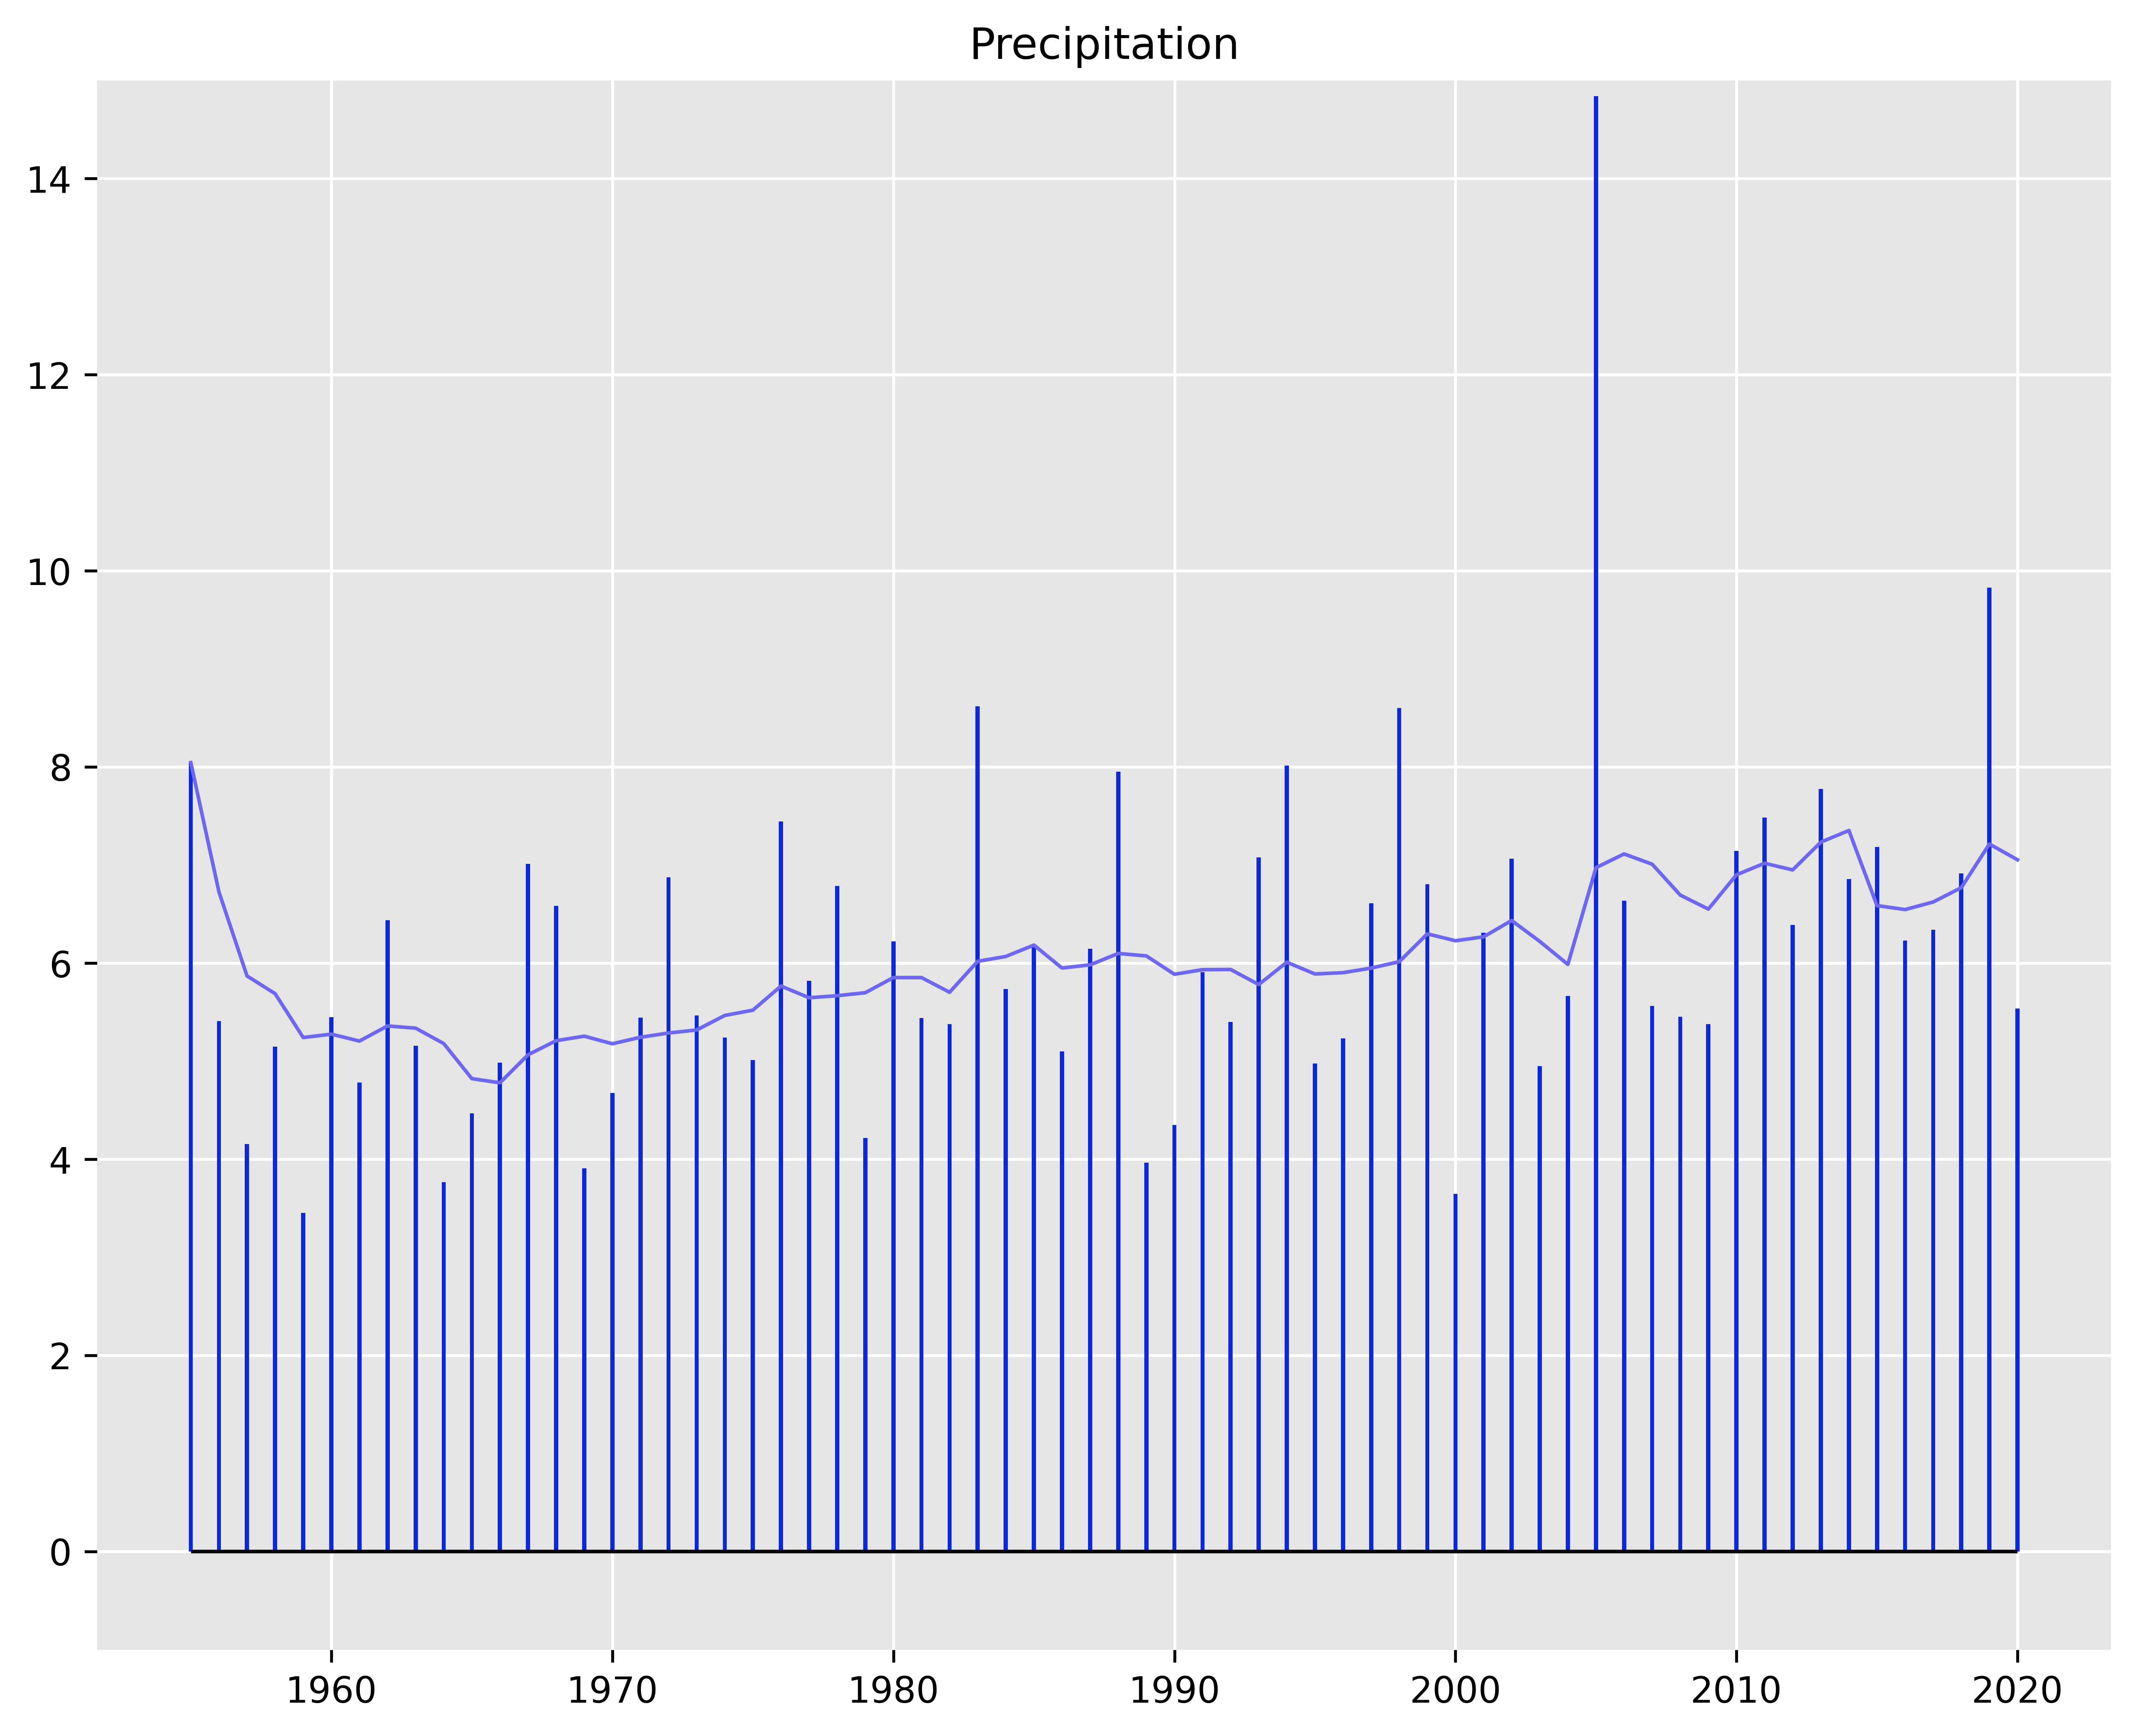

In [210]:
plt.figure(figsize = (10,8), dpi=600, facecolor='white')
ax= plt.axes()
ax.set_axisbelow(True)
ax.set_facecolor("#E6E6E6")
plt.grid(color='w', linestyle='solid')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.bar(final_q5.index, final_q5.RATIO, align='center',color='#0d28d6', 
width=0.15)
plt.ylim(-1,15)
plt.plot(final_q5.index, final_q5.RM, linewidth=1, color= '#6e67f0', ls= "-") 
plt.hlines(xmin=1955, xmax=2020, y=0, linewidth=1, color='black')
plt.title("Precipitation")


### Q5 Diagram Interpretation
The diagram that we created displays the ratio of rainfall over rainy days for each year for the timespan 1955-2020. It can help us understand the rain concentration throughout the years. 
The overlaying line is the 10 years rolling average which is very important because it provides us with an average line over time, and in this case the past 10 years, and it smooths the peaks and the valleys to the average over this period of time. 
As we can see in 2005 our measurements are a lot above the 10 years rolling mean which means that either the data are not valid or in that year we experienced an extreme rainfall phenomenon.
In general the rain concentration does not experience a great amount of fluctuations (we can observe a pattern) and even when it does not diverging a lot from this pattern.